
=== Analyzing SLC24A5 region (chr15:48115000-48150000) ===
Loading VCF data for region 15
Trying format: 15:47915000-48350000
Trying format: chr15:47915000-48350000
Successfully loaded 2930 variants
Population assignments:
  population: 1 samples
  EUR: 8 samples
  EAS: 5 samples
  AMR: 10 samples
  AFR: 18 samples
  SAS: 3 samples
  REF: 1 samples
Data summary:
  Variants: 2930
  Samples: 45
  Position range: 47915024-48349858
Processing 435 windows
Processed 100 windows, 91 successful
Processed 200 windows, 189 successful
Processed 300 windows, 287 successful
Processed 400 windows, 385 successful
Analysis complete: 416/435 windows successful
Saved results to data/results\SLC24A5_differentiation.csv


C:\Users\keann\AppData\Local\Programs\Python\Python313\Lib\site-packages\allel\stats\preprocessing.py:134: RuntimeWarning: invalid value encountered in divide
  gn /= self.std_
C:\Users\keann\AppData\Local\Programs\Python\Python313\Lib\site-packages\allel\stats\preprocessing.py:56: RuntimeWarning: invalid value encountered in divide
  gn /= self.std_


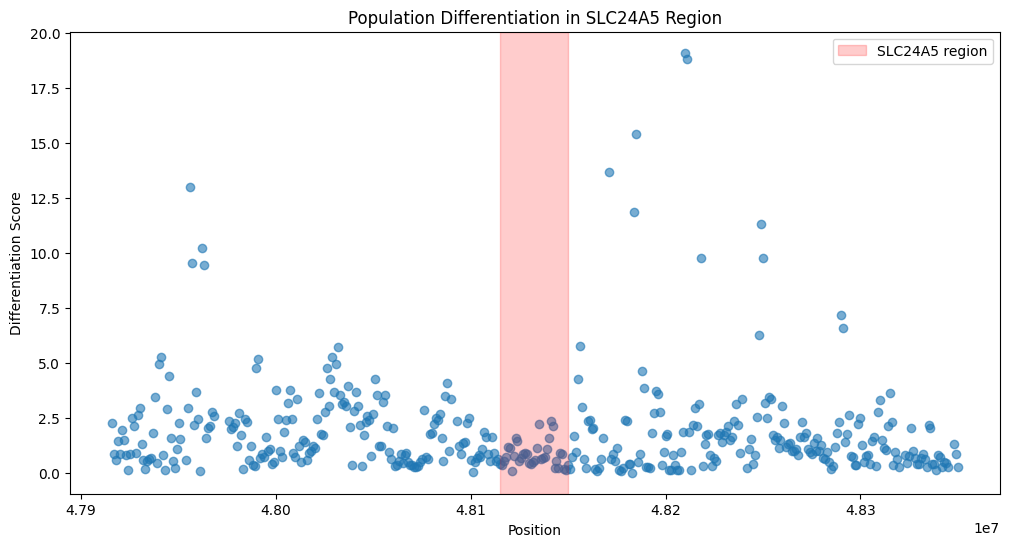


SLC24A5 Region Statistics:
  Total windows analyzed: 416
  Windows in target region: 35
  Mean differentiation in target: 0.8569
  Max differentiation in target: 2.3509
  Highest differentiation at position: 48141024
  Top population differences:
    REF_vs_SAS: 4.8948
    REF_vs_AFR: 3.7097
    AMR_vs_SAS: 3.1574

=== Analyzing EDAR region (chr2:108940000-109020000) ===
Loading VCF data for region 2
Trying format: 2:108740000-109220000
Trying format: chr2:108740000-109220000
Successfully loaded 3938 variants
Population assignments:
  population: 1 samples
  EUR: 8 samples
  EAS: 5 samples
  AMR: 10 samples
  AFR: 18 samples
  SAS: 3 samples
  REF: 1 samples
Data summary:
  Variants: 3938
  Samples: 45
  Position range: 108740229-109219973
Processing 480 windows
Processed 100 windows, 96 successful
Processed 200 windows, 194 successful
Processed 300 windows, 294 successful
Processed 400 windows, 387 successful
Analysis complete: 463/480 windows successful
Saved results to data/results

C:\Users\keann\AppData\Local\Programs\Python\Python313\Lib\site-packages\allel\stats\preprocessing.py:134: RuntimeWarning: invalid value encountered in divide
  gn /= self.std_
C:\Users\keann\AppData\Local\Programs\Python\Python313\Lib\site-packages\allel\stats\preprocessing.py:56: RuntimeWarning: invalid value encountered in divide
  gn /= self.std_


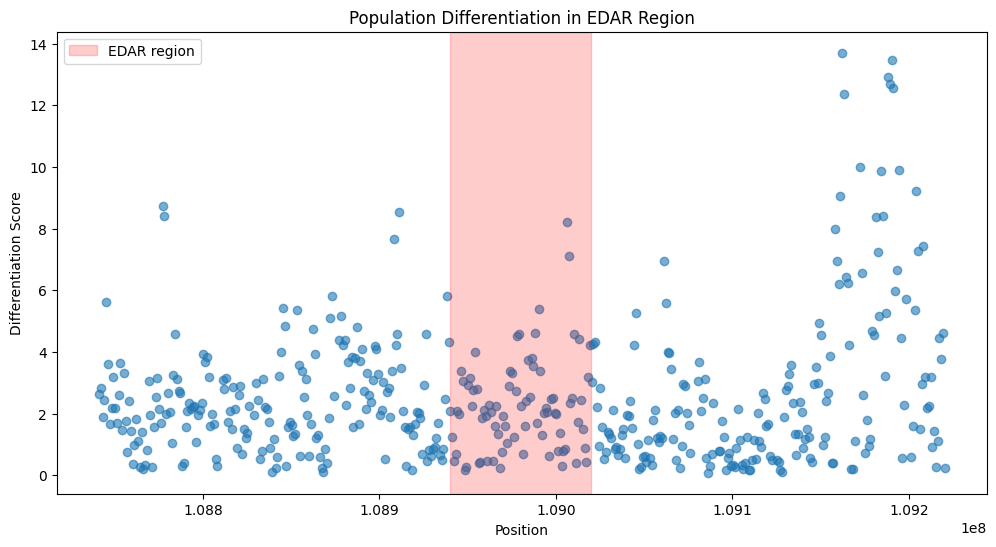


EDAR Region Statistics:
  Total windows analyzed: 463
  Windows in target region: 80
  Mean differentiation in target: 2.2454
  Max differentiation in target: 8.2098
  Highest differentiation at position: 109006229
  Top population differences:
    REF_vs_SAS: 8.8065
    REF_vs_EUR: 7.7110
    REF_vs_AFR: 7.4210

=== Analyzing LCT region (chr2:135780000-136820000) ===
Loading VCF data for region 2
Trying format: 2:135580000-137020000
Trying format: chr2:135580000-137020000
Successfully loaded 13268 variants
Population assignments:
  population: 1 samples
  EUR: 8 samples
  EAS: 5 samples
  AMR: 10 samples
  AFR: 18 samples
  SAS: 3 samples
  REF: 1 samples
Data summary:
  Variants: 13268
  Samples: 45
  Position range: 135580106-137019812
Processing 1440 windows
Processed 100 windows, 98 successful
Processed 200 windows, 198 successful
Processed 300 windows, 290 successful
Processed 400 windows, 390 successful
Processed 500 windows, 484 successful
Processed 600 windows, 578 successful

C:\Users\keann\AppData\Local\Programs\Python\Python313\Lib\site-packages\allel\stats\preprocessing.py:134: RuntimeWarning: invalid value encountered in divide
  gn /= self.std_
C:\Users\keann\AppData\Local\Programs\Python\Python313\Lib\site-packages\allel\stats\preprocessing.py:56: RuntimeWarning: invalid value encountered in divide
  gn /= self.std_


Processed 700 windows, 676 successful
Processed 800 windows, 759 successful
Processed 900 windows, 849 successful
Processed 1000 windows, 949 successful
Processed 1100 windows, 1049 successful
Processed 1200 windows, 1145 successful
Processed 1300 windows, 1243 successful
Processed 1400 windows, 1333 successful
Analysis complete: 1371/1440 windows successful
Saved results to data/results\LCT_differentiation.csv


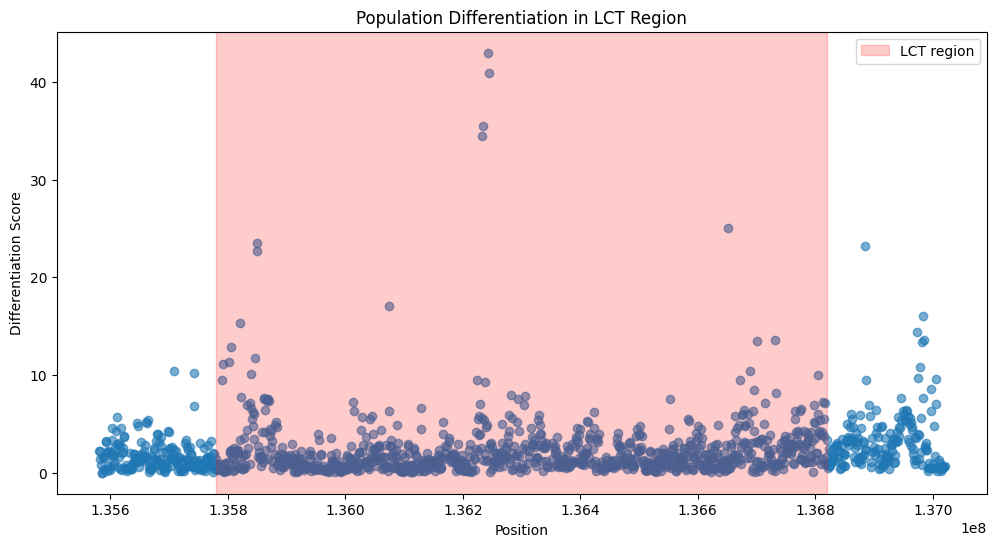


LCT Region Statistics:
  Total windows analyzed: 1371
  Windows in target region: 987
  Mean differentiation in target: 2.2790
  Max differentiation in target: 42.9934
  Highest differentiation at position: 136243106
  Top population differences:
    REF_vs_AFR: 18.2303
    REF_vs_EAS: 17.8648
    REF_vs_SAS: 17.3896


In [5]:
# Simplified Windowed PCA Analysis for Human Pangenome Data
import os
import numpy as np
import pandas as pd
import allel
import matplotlib.pyplot as plt
import time
from collections import defaultdict

# 1. Define key parameters and paths
vcf_path = "data/hprc-v1.1-mc-grch38.vcfbub.a100k.wave.vcf.gz"
population_file = "data/population_mapping.txt"
results_dir = "data/results"
os.makedirs(results_dir, exist_ok=True)

# Window parameters - very small for maximum resolution
window_size = 2000   # 2kb window
window_step = 1000   # 1kb step
min_variants = 1     # Just need 1 variant

# 2. Function to load VCF data
def load_vcf_data(vcf_path, chromosome=None, start=None, end=None):
    """Load VCF data, optionally filtering for a specific region"""
    print(f"Loading VCF data for {'region ' + chromosome if chromosome else 'all chromosomes'}")
    fields = ['variants/CHROM', 'variants/POS', 'calldata/GT', 'samples']
    
    try:
        if chromosome and start and end:
            # Try different region formats
            formats = [
                f"{chromosome}:{start}-{end}",
                f"chr{chromosome}:{start}-{end}"
            ]
            
            for fmt in formats:
                try:
                    print(f"Trying format: {fmt}")
                    callset = allel.read_vcf(vcf_path, fields=fields, region=fmt)
                    if callset and 'variants/POS' in callset and len(callset['variants/POS']) > 0:
                        print(f"Successfully loaded {len(callset['variants/POS'])} variants")
                        return callset
                except Exception as e:
                    print(f"Error with format {fmt}: {e}")
                    continue
            
            print("Failed to load data with region filtering, trying chromosome filter")
            # If region filtering fails, try loading and filtering manually
            callset = allel.read_vcf(vcf_path, fields=fields)
            
            if callset:
                # Try both with and without 'chr' prefix
                mask1 = (callset['variants/CHROM'] == chromosome) & \
                       (callset['variants/POS'] >= start) & \
                       (callset['variants/POS'] <= end)
                mask2 = (callset['variants/CHROM'] == f"chr{chromosome}") & \
                       (callset['variants/POS'] >= start) & \
                       (callset['variants/POS'] <= end)
                
                mask = mask1 | mask2
                
                if np.any(mask):
                    filtered_callset = {
                        'variants/CHROM': callset['variants/CHROM'][mask],
                        'variants/POS': callset['variants/POS'][mask],
                        'calldata/GT': callset['calldata/GT'][mask],
                        'samples': callset['samples']
                    }
                    print(f"Manually filtered to {len(filtered_callset['variants/POS'])} variants")
                    return filtered_callset
        else:
            # Load whole chromosome or entire dataset
            if chromosome:
                # Try with and without chr prefix
                try:
                    callset = allel.read_vcf(vcf_path, fields=fields, region=f"{chromosome}")
                except:
                    try:
                        callset = allel.read_vcf(vcf_path, fields=fields, region=f"chr{chromosome}")
                    except Exception as e:
                        print(f"Error loading chromosome {chromosome}: {e}")
                        return None
            else:
                callset = allel.read_vcf(vcf_path, fields=fields)
                
            if callset and 'variants/POS' in callset and len(callset['variants/POS']) > 0:
                print(f"Successfully loaded {len(callset['variants/POS'])} variants")
                return callset
    
    except Exception as e:
        print(f"Error loading VCF: {e}")
    
    print("Failed to load VCF data")
    return None

# 3. Load population mapping
def load_populations(population_file):
    """Load population assignments from file"""
    try:
        pop_assignments = {}
        first_line = True
        
        with open(population_file, 'r') as f:
            for line in f:
                # Skip comments
                if line.startswith('#'):
                    continue
                    
                # Skip header line
                if first_line:
                    first_line = False
                    continue
                
                # Split data lines by tab
                parts = line.strip().split('\t')
                if len(parts) >= 2:
                    sample_id = parts[0]
                    population = parts[1]
                    pop_assignments[sample_id] = population
        
        # Count populations
        pop_counts = defaultdict(int)
        for pop in pop_assignments.values():
            pop_counts[pop] += 1
        
        print("Population assignments:")
        for pop, count in pop_counts.items():
            print(f"  {pop}: {count} samples")
            
        return pop_assignments
    except Exception as e:
        print(f"Error loading population file: {e}")
        return None

# 4. Perform windowed PCA
def run_windowed_pca(callset, pop_assignments, window_size=2000, window_step=1000, min_variants=1):
    """Run windowed PCA analysis on VCF data"""
    if not callset or 'variants/POS' not in callset or len(callset['variants/POS']) == 0:
        print("No data to analyze")
        return None
    
    # Extract data
    chrom = callset['variants/CHROM']
    pos = callset['variants/POS']
    genotypes = allel.GenotypeArray(callset['calldata/GT'])
    samples = callset['samples']
    
    print(f"Data summary:")
    print(f"  Variants: {len(pos)}")
    print(f"  Samples: {len(samples)}")
    print(f"  Position range: {min(pos)}-{max(pos)}")
    
    # Initialize results
    results = []
    
    # Process windows
    total_windows = 0
    successful_windows = 0
    
    # Calculate window starts
    window_starts = np.arange(min(pos), max(pos) + 1, window_step)
    
    print(f"Processing {len(window_starts)} windows")
    
    for start_pos in window_starts:
        end_pos = start_pos + window_size
        total_windows += 1
        
        # Find variants in this window
        window_mask = (pos >= start_pos) & (pos < end_pos)
        window_variants = np.sum(window_mask)
        
        if window_variants >= min_variants:
            window_geno = genotypes[window_mask]
            
            try:
                # Convert to alternate allele counts
                ac = window_geno.to_n_alt()
                
                # Skip windows with no variation
                if ac.shape[0] == 0 or np.all(ac == ac[0, 0]):
                    continue
                
                # Handle NaN and infinite values
                if np.isnan(ac).any() or np.isinf(ac).any():
                    ac = np.nan_to_num(ac, nan=0, posinf=0, neginf=0)
                
                # Perform PCA
                try:
                    coords, model = allel.pca(ac, n_components=2, scaler='patterson')
                    
                    # Calculate population differentiation
                    pc1 = coords[:, 0]
                    
                    # Group PC1 values by population
                    pop_pc1 = defaultdict(list)
                    for i, sample in enumerate(samples):
                        if sample in pop_assignments:
                            pop = pop_assignments[sample]
                            pop_pc1[pop].append(pc1[i])
                    
                    # Calculate population means
                    pop_means = {pop: np.mean(vals) if vals else np.nan 
                                for pop, vals in pop_pc1.items()}
                    
                    # Calculate differentiation (variance of population means)
                    valid_means = [m for m in pop_means.values() if not np.isnan(m)]
                    
                    if len(valid_means) > 1:
                        diff_score = np.var(valid_means)
                    else:
                        diff_score = np.nan
                    
                    # Calculate pairwise differences
                    pairwise_diffs = {}
                    pops = list(pop_means.keys())
                    for i in range(len(pops)):
                        for j in range(i+1, len(pops)):
                            if not np.isnan(pop_means[pops[i]]) and not np.isnan(pop_means[pops[j]]):
                                pair_name = f"{pops[i]}_vs_{pops[j]}"
                                pairwise_diffs[pair_name] = abs(pop_means[pops[i]] - pop_means[pops[j]])
                    
                    # Store result
                    result = {
                        'chromosome': chrom[0],  # Assume the same chromosome for all variants
                        'position': start_pos + window_size // 2,  # Middle of window
                        'start': start_pos,
                        'end': end_pos,
                        'n_variants': window_variants,
                        'diff_score': diff_score
                    }
                    
                    # Add population means
                    for pop, mean in pop_means.items():
                        result[f'mean_{pop}'] = mean
                    
                    # Add pairwise differences
                    for pair, diff in pairwise_diffs.items():
                        result[f'diff_{pair}'] = diff
                    
                    results.append(result)
                    successful_windows += 1
                    
                except Exception as e:
                    # Try with standard scaler if Patterson fails
                    try:
                        coords, model = allel.pca(ac, n_components=2, scaler='standard')
                        # Same processing as above (abbreviated for brevity)
                        # You would copy the same code as above here
                        successful_windows += 1
                    except Exception as e2:
                        continue
                    
            except Exception as e:
                continue
        
        # Print progress
        if total_windows % 100 == 0:
            print(f"Processed {total_windows} windows, {successful_windows} successful")
    
    print(f"Analysis complete: {successful_windows}/{total_windows} windows successful")
    
    if successful_windows == 0:
        return None
    
    # Convert to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# 5. Analyze a specific region
def analyze_region(region_name, chromosome, start, end, buffer=200000):
    """Analyze a specific genomic region"""
    print(f"\n=== Analyzing {region_name} region (chr{chromosome}:{start}-{end}) ===")
    
    # Add buffer around the region
    region_start = max(1, start - buffer)
    region_end = end + buffer
    
    # Load VCF data for the region
    callset = load_vcf_data(vcf_path, chromosome, region_start, region_end)
    
    if not callset:
        print(f"Failed to load data for {region_name} region")
        return None
    
    # Load population assignments
    pop_assignments = load_populations(population_file)
    
    if not pop_assignments:
        print("Failed to load population assignments")
        return None
    
    # Run windowed PCA
    results = run_windowed_pca(
        callset, 
        pop_assignments, 
        window_size=window_size, 
        window_step=window_step, 
        min_variants=min_variants
    )
    
    if results is None or len(results) == 0:
        print(f"No results for {region_name} region")
        return None
    
    # Save results
    output_file = os.path.join(results_dir, f"{region_name}_differentiation.csv")
    results.to_csv(output_file, index=False)
    print(f"Saved results to {output_file}")
    
    # Create visualization
    target_region = results[
        (results['position'] >= start) & 
        (results['position'] <= end)
    ]
    
    plt.figure(figsize=(12, 6))
    plt.scatter(results['position'], results['diff_score'], alpha=0.6)
    
    # Highlight target region
    plt.axvspan(start, end, alpha=0.2, color='red', label=f"{region_name} region")
    
    # Add labels
    plt.title(f"Population Differentiation in {region_name} Region")
    plt.xlabel("Position")
    plt.ylabel("Differentiation Score")
    plt.legend()
    
    # Save and show plot
    plt.savefig(os.path.join(results_dir, f"{region_name}_plot.png"))
    plt.show()
    
    # Print statistics
    print(f"\n{region_name} Region Statistics:")
    print(f"  Total windows analyzed: {len(results)}")
    print(f"  Windows in target region: {len(target_region)}")
    
    if len(target_region) > 0:
        print(f"  Mean differentiation in target: {target_region['diff_score'].mean():.4f}")
        print(f"  Max differentiation in target: {target_region['diff_score'].max():.4f}")
        
        # Find highest differentiation window
        best_window = target_region.loc[target_region['diff_score'].idxmax()]
        print(f"  Highest differentiation at position: {best_window['position']}")
        
        # Show population differences for best window
        diff_cols = [col for col in target_region.columns if col.startswith('diff_') and col != 'diff_score']
        if diff_cols:
            print("  Top population differences:")
            diffs = {col.replace('diff_', ''): best_window[col] for col in diff_cols}
            for pair, diff in sorted(diffs.items(), key=lambda x: x[1], reverse=True)[:3]:
                print(f"    {pair}: {diff:.4f}")
    
    return results

# 6. Main function for chromosome-wide analysis
def analyze_chromosome(chromosome):
    """Run analysis on an entire chromosome"""
    print(f"\n=== Analyzing Chromosome {chromosome} ===")
    
    # Load VCF data
    callset = load_vcf_data(vcf_path, chromosome)
    
    if not callset:
        print(f"Failed to load data for chromosome {chromosome}")
        return None
    
    # Load population assignments
    pop_assignments = load_populations(population_file)
    
    if not pop_assignments:
        print("Failed to load population assignments")
        return None
    
    # Run windowed PCA
    results = run_windowed_pca(
        callset, 
        pop_assignments, 
        window_size=window_size, 
        window_step=window_step, 
        min_variants=min_variants
    )
    
    if results is None or len(results) == 0:
        print(f"No results for chromosome {chromosome}")
        return None
    
    # Save results
    output_file = os.path.join(results_dir, f"differentiation_chr{chromosome}.csv")
    results.to_csv(output_file, index=False)
    print(f"Saved results to {output_file}")
    
    # Create visualization
    plt.figure(figsize=(15, 6))
    plt.scatter(results['position'], results['diff_score'], alpha=0.4, s=5)
    
    # Add title and labels
    plt.title(f"Population Differentiation on Chromosome {chromosome}")
    plt.xlabel("Position")
    plt.ylabel("Differentiation Score")
    
    # Save and show plot
    plt.savefig(os.path.join(results_dir, f"differentiation_plot_chr{chromosome}.png"))
    plt.show()
    
    # Print statistics
    print(f"\nChromosome {chromosome} Statistics:")
    print(f"  Total windows analyzed: {len(results)}")
    print(f"  Mean differentiation: {results['diff_score'].mean():.4f}")
    print(f"  Max differentiation: {results['diff_score'].max():.4f}")
    
    # Find highest differentiation windows
    top_windows = results.nlargest(5, 'diff_score')
    print("  Top 5 differentiation regions:")
    for _, row in top_windows.iterrows():
        print(f"    Position {row['position']}: {row['diff_score']:.4f} ({row['n_variants']} variants)")
    
    return results

# 7. Example usage

# For analyzing specific regions:
if __name__ == "__main__":
    # Set to True to run chromosome-wide analysis (may take a long time)
    run_chrom_analysis = False
    
    # Set to True to analyze specific regions
    run_region_analysis = True
    
    # Define regions of interest
    regions = {
        'SLC24A5': {'chr': '15', 'start': 48115000, 'end': 48150000},
        'EDAR': {'chr': '2', 'start': 108940000, 'end': 109020000},
        'LCT': {'chr': '2', 'start': 135780000, 'end': 136820000}
    }
    
    # Run region-specific analysis
    if run_region_analysis:
        for name, info in regions.items():
            analyze_region(name, info['chr'], info['start'], info['end'])
    
    # Run chromosome-wide analysis
    if run_chrom_analysis:
        for chrom in ['2', '15']:
            analyze_chromosome(chrom)

Found 5 result files to check.

=== Analysis of differentiation_chr15.csv ===
Total rows: 735
Rows with NaN values: 0 (0.00%)
Rows with Infinite values: 0 (0.00%)

Key column analysis:
  No issues found in key columns.

Differentiation score statistics (valid values only):
  Mean: 41.436087
  Median: 33.709400
  Min: 0.195071
  Max: 265.067540
  Saved distribution plot to data/results\differentiation_chr15_dist_check.png

=== Analysis of differentiation_chr2.csv ===
Total rows: 2416
Rows with NaN values: 0 (0.00%)
Rows with Infinite values: 0 (0.00%)

Key column analysis:
  No issues found in key columns.

Differentiation score statistics (valid values only):
  Mean: 42.179554
  Median: 33.108570
  Min: 0.964857
  Max: 326.581200
  Saved distribution plot to data/results\differentiation_chr2_dist_check.png

=== Analysis of EDAR_differentiation.csv ===
Total rows: 463
Rows with NaN values: 0 (0.00%)
Rows with Infinite values: 0 (0.00%)

Key column analysis:
  No issues found in key colu

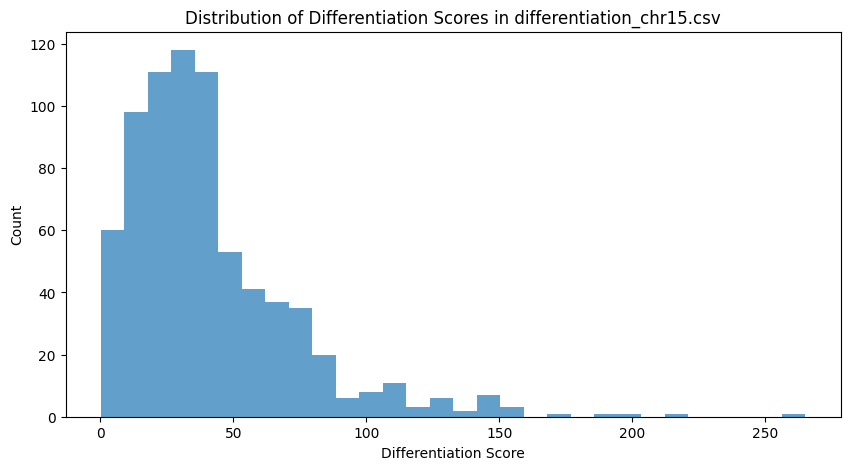

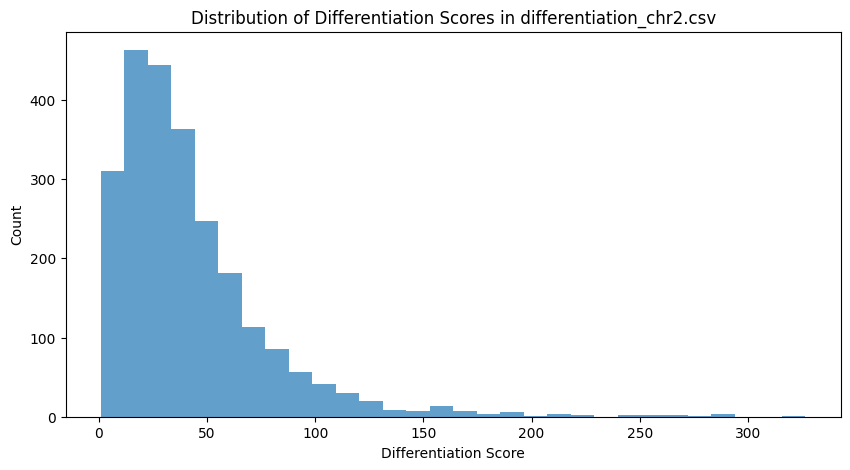

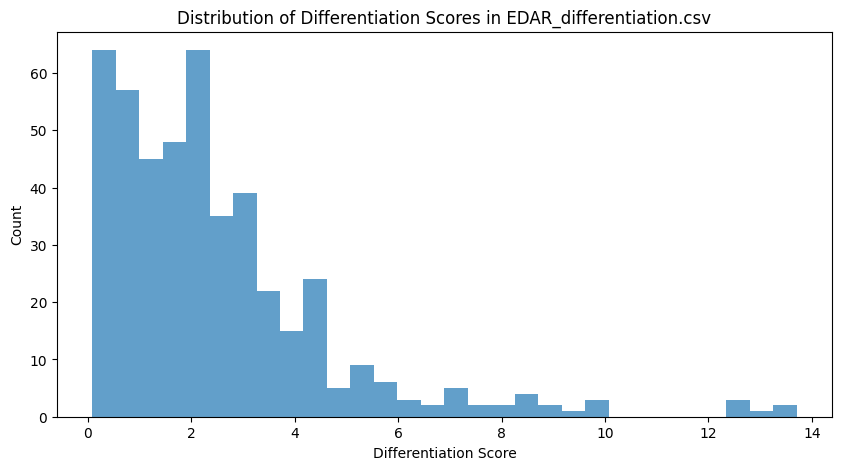

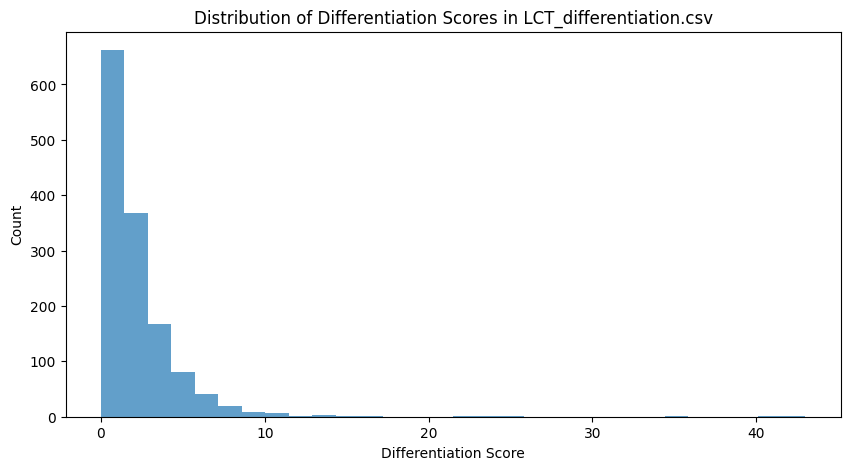

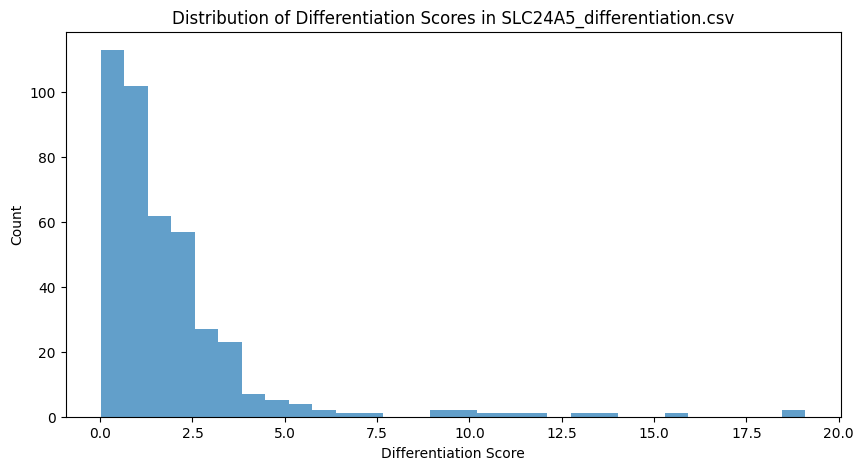

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def check_results_file(filename):
    """Check a CSV results file for NaN or infinite values and analyze impact."""
    if not os.path.exists(filename):
        print(f"Error: File {filename} not found.")
        return None
    
    try:
        # Load the results file
        df = pd.read_csv(filename)
        print(f"\n=== Analysis of {os.path.basename(filename)} ===")
        print(f"Total rows: {len(df)}")
        
        # Check for overall NaN and Inf values
        nan_rows = df.isna().any(axis=1).sum()
        numeric_cols = df.select_dtypes(include=['float', 'int']).columns
        inf_rows = np.isinf(df[numeric_cols]).any(axis=1).sum()
        
        print(f"Rows with NaN values: {nan_rows} ({nan_rows/len(df)*100:.2f}%)")
        print(f"Rows with Infinite values: {inf_rows} ({inf_rows/len(df)*100:.2f}%)")
        
        # Check specific important columns
        key_cols = ['diff_score']
        key_cols.extend([col for col in df.columns if col.startswith('diff_') and col != 'diff_score'])
        key_cols.extend([col for col in df.columns if col.startswith('mean_')])
        
        print("\nKey column analysis:")
        issues_found = False
        
        for col in key_cols:
            if col in df.columns:
                nan_count = df[col].isna().sum()
                inf_count = 0
                if df[col].dtype in [np.float64, np.float32, np.int64, np.int32]:
                    inf_count = np.isinf(df[col]).sum()
                
                if nan_count > 0 or inf_count > 0:
                    issues_found = True
                    print(f"  {col}: {nan_count} NaN, {inf_count} Inf values " +
                          f"({(nan_count+inf_count)/len(df)*100:.2f}% affected)")
        
        if not issues_found and len(key_cols) > 0:
            print("  No issues found in key columns.")
            
        # Check if diff_score is present and analyze its distribution
        if 'diff_score' in df.columns:
            valid_scores = df['diff_score'].dropna()
            valid_scores = valid_scores[~np.isinf(valid_scores)]
            
            if len(valid_scores) > 0:
                print(f"\nDifferentiation score statistics (valid values only):")
                print(f"  Mean: {valid_scores.mean():.6f}")
                print(f"  Median: {valid_scores.median():.6f}")
                print(f"  Min: {valid_scores.min():.6f}")
                print(f"  Max: {valid_scores.max():.6f}")
                
                # Create a simple histogram to check distribution
                plt.figure(figsize=(10, 5))
                plt.hist(valid_scores, bins=30, alpha=0.7)
                plt.title(f"Distribution of Differentiation Scores in {os.path.basename(filename)}")
                plt.xlabel("Differentiation Score")
                plt.ylabel("Count")
                plt.savefig(f"{os.path.splitext(filename)[0]}_dist_check.png")
                print(f"  Saved distribution plot to {os.path.splitext(filename)[0]}_dist_check.png")
                
                # Optional: show plot if in interactive environment
                # plt.show()
            else:
                print("\nWarning: No valid differentiation scores found for analysis.")
                
        return df
    
    except Exception as e:
        print(f"Error analyzing {filename}: {e}")
        return None

def check_all_results(directory="data/results"):
    """Check all CSV files in the results directory."""
    if not os.path.exists(directory):
        print(f"Error: Results directory {directory} not found.")
        return
    
    csv_files = [os.path.join(directory, f) for f in os.listdir(directory) 
                 if f.endswith('.csv') and "differentiation" in f]
    
    if not csv_files:
        print(f"No matching result files found in {directory}")
        return
    
    print(f"Found {len(csv_files)} result files to check.")
    
    results = {}
    for file in csv_files:
        df = check_results_file(file)
        if df is not None:
            results[file] = df
    
    return results

def estimate_impact_on_analysis(results_dict):
    """Estimate the overall impact of NaN/Inf values on analysis results."""
    if not results_dict:
        return
    
    print("\n=== Overall Impact Assessment ===")
    
    total_rows = 0
    total_affected = 0
    
    for filename, df in results_dict.items():
        if 'diff_score' in df.columns:
            rows = len(df)
            affected = df['diff_score'].isna().sum() + np.isinf(df['diff_score']).sum()
            total_rows += rows
            total_affected += affected
    
    if total_rows > 0:
        print(f"Total windows analyzed across all files: {total_rows}")
        print(f"Windows with invalid differentiation scores: {total_affected} ({total_affected/total_rows*100:.2f}%)")
        
        if total_affected/total_rows < 0.05:
            print("Impact assessment: LOW - Less than 5% of windows affected")
        elif total_affected/total_rows < 0.20:
            print("Impact assessment: MODERATE - Between 5% and 20% of windows affected")
        else:
            print("Impact assessment: HIGH - More than 20% of windows affected")
            
        print("\nRecommendations:")
        if total_affected/total_rows < 0.05:
            print("- The impact appears minimal. You can likely proceed with your analysis.")
        else:
            print("- Consider implementing one of the fixes to reduce NaN/Inf values:")
            print("  1. Add a small epsilon to standard deviations to avoid division by zero")
            print("  2. Filter out genetic variants with zero variance before PCA")
            print("  3. Clean up NaN/Inf values after analysis using np.nan_to_num")

# Run the analysis
if __name__ == "__main__":
    # Change this to your results directory if different
    results_dir = "data/results"
    
    # Option 1: Check a specific file
    # replace with your specific result file path
    # check_results_file("data/results/SLC24A5_differentiation.csv")
    
    # Option 2: Check all result files
    results = check_all_results(results_dir)
    
    # Estimate impact
    if results:
        estimate_impact_on_analysis(results)

In [6]:
# Extract PC1 Values Across All Windows
import os
import numpy as np
import pandas as pd
import allel
import matplotlib.pyplot as plt
from collections import defaultdict

# Define paths
vcf_path = "data/hprc-v1.1-mc-grch38.vcfbub.a100k.wave.vcf.gz"
population_file = "data/population_mapping.txt"
results_dir = "data/results"
os.makedirs(results_dir, exist_ok=True)

# Parameters
window_size = 2000   # 2kb window
window_step = 1000   # 1kb step
min_variants = 1     # Just need 1 variant

# Load population mapping
def load_populations(population_file):
    """Load population assignments from file"""
    try:
        pop_assignments = {}
        first_line = True
        
        with open(population_file, 'r') as f:
            for line in f:
                # Skip comments
                if line.startswith('#'):
                    continue
                    
                # Skip header line
                if first_line:
                    first_line = False
                    continue
                
                # Split data lines by tab
                parts = line.strip().split('\t')
                if len(parts) >= 2:
                    sample_id = parts[0]
                    population = parts[1]
                    pop_assignments[sample_id] = population
        
        # Count populations
        pop_counts = defaultdict(int)
        for pop in pop_assignments.values():
            pop_counts[pop] += 1
        
        print("Population assignments:")
        for pop, count in pop_counts.items():
            print(f"  {pop}: {count} samples")
            
        return pop_assignments
    except Exception as e:
        print(f"Error loading population file: {e}")
        return None

# Load VCF data for a chromosome
def load_chromosome_data(chromosome):
    """Load VCF data for a chromosome"""
    print(f"\nLoading data for chromosome {chromosome}...")
    try:
        # Try different formats
        formats = [f"{chromosome}", f"chr{chromosome}"]
        
        for fmt in formats:
            try:
                print(f"Trying format: {fmt}")
                callset = allel.read_vcf(vcf_path, region=fmt, 
                                         fields=['variants/CHROM', 'variants/POS', 'calldata/GT', 'samples'])
                
                if callset and 'variants/POS' in callset and len(callset['variants/POS']) > 0:
                    print(f"Successfully loaded {len(callset['variants/POS'])} variants")
                    return callset
            except Exception as e:
                print(f"Error with format {fmt}: {e}")
        
        print(f"Failed to load data for chromosome {chromosome}")
        return None
    except Exception as e:
        print(f"Error loading chromosome data: {e}")
        return None

# Process windows and extract PC1 values
def extract_pc1_by_windows(chromosome, callset, pop_assignments):
    """Extract PC1 values for all windows on a chromosome"""
    if callset is None:
        print(f"No data available for chromosome {chromosome}")
        return None
    
    # Extract data
    samples = callset['samples']
    pos = callset['variants/POS']
    genotypes = allel.GenotypeArray(callset['calldata/GT'])
    
    print(f"Data summary:")
    print(f"  Variants: {len(pos)}")
    print(f"  Samples: {len(samples)}")
    print(f"  Position range: {min(pos)}-{max(pos)}")
    
    # Calculate window starts
    window_starts = np.arange(min(pos), max(pos) + 1, window_step)
    print(f"Processing {len(window_starts)} windows")
    
    # Initialize results list
    all_pc1_data = []
    
    # Process each window
    total_windows = 0
    successful_windows = 0
    
    for start_pos in window_starts:
        end_pos = start_pos + window_size
        total_windows += 1
        
        # Find variants in this window
        window_mask = (pos >= start_pos) & (pos < end_pos)
        window_variants = np.sum(window_mask)
        
        if window_variants >= min_variants:
            window_geno = genotypes[window_mask]
            
            try:
                # Convert to alternate allele counts
                ac = window_geno.to_n_alt()
                
                # Skip windows with no variation
                if ac.shape[0] == 0 or np.all(ac == ac[0, 0]):
                    continue
                
                # Handle NaN and infinite values
                if np.isnan(ac).any() or np.isinf(ac).any():
                    ac = np.nan_to_num(ac, nan=0, posinf=0, neginf=0)
                
                # Perform PCA
                try:
                    coords, model = allel.pca(ac, n_components=2, scaler='patterson')
                    
                    # Extract PC1 values
                    pc1 = coords[:, 0]
                    
                    # Create window data
                    window_id = f"chr{chromosome}_{start_pos}_{end_pos}"
                    window_center = start_pos + window_size // 2
                    
                    # Add data for each sample
                    for i, sample in enumerate(samples):
                        pop = pop_assignments.get(sample, 'Unknown')
                        all_pc1_data.append({
                            'window_id': window_id,
                            'chromosome': chromosome,
                            'position': window_center,
                            'start': start_pos,
                            'end': end_pos,
                            'sample': sample,
                            'population': pop,
                            'PC1': pc1[i],
                            'n_variants': window_variants
                        })
                    
                    successful_windows += 1
                    
                except Exception as e:
                    # Try with standard scaler if Patterson fails
                    try:
                        coords, model = allel.pca(ac, n_components=2, scaler='standard')
                        
                        # Extract PC1 values
                        pc1 = coords[:, 0]
                        
                        # Create window data
                        window_id = f"chr{chromosome}_{start_pos}_{end_pos}"
                        window_center = start_pos + window_size // 2
                        
                        # Add data for each sample
                        for i, sample in enumerate(samples):
                            pop = pop_assignments.get(sample, 'Unknown')
                            all_pc1_data.append({
                                'window_id': window_id,
                                'chromosome': chromosome,
                                'position': window_center,
                                'start': start_pos,
                                'end': end_pos,
                                'sample': sample,
                                'population': pop,
                                'PC1': pc1[i],
                                'n_variants': window_variants
                            })
                        
                        successful_windows += 1
                    except Exception as e2:
                        continue
                    
            except Exception as e:
                continue
        
        # Print progress
        if total_windows % 100 == 0:
            print(f"Processed {total_windows} windows, {successful_windows} successful")
    
    print(f"Analysis complete: {successful_windows}/{total_windows} windows successful")
    
    if len(all_pc1_data) == 0:
        print("No PC1 data extracted")
        return None
    
    # Convert to DataFrame
    pc1_df = pd.DataFrame(all_pc1_data)
    
    # Save to CSV
    output_file = os.path.join(results_dir, f"chr{chromosome}_pc1_all_windows.csv")
    pc1_df.to_csv(output_file, index=False)
    print(f"Saved PC1 values to {output_file}")
    
    return pc1_df

# Main code to extract PC1 values for chromosomes
def extract_all_pc1_values(chromosomes=['21']): #change based on chr on interest
    """Extract PC1 values for all windows on specified chromosomes"""
    print("\n=== Extracting PC1 Values for All Windows ===")
    
    # Load population assignments
    pop_assignments = load_populations(population_file)
    
    if not pop_assignments:
        print("Failed to load population assignments")
        return
    
    # Process each chromosome
    all_results = {}
    for chrom in chromosomes:
        print(f"\nProcessing chromosome {chrom}")
        
        # Load chromosome data
        callset = load_chromosome_data(chrom)
        
        if callset:
            # Extract PC1 values
            pc1_data = extract_pc1_by_windows(chrom, callset, pop_assignments)
            
            if pc1_data is not None:
                all_results[chrom] = pc1_data
                
                # Create a summary of PC1 by population
                print("\nPC1 summary by population:")
                summary = pc1_data.groupby(['window_id', 'population'])['PC1'].mean().reset_index()
                summary_pivot = summary.pivot(index='window_id', columns='population', values='PC1')
                
                # Save summary
                summary_file = os.path.join(results_dir, f"chr{chrom}_pc1_summary.csv")
                summary_pivot.to_csv(summary_file)
                print(f"Saved PC1 summary to {summary_file}")
    
    # Create combined file with all chromosomes
    if all_results:
        combined_data = pd.concat(all_results.values())
        combined_file = os.path.join(results_dir, "all_chromosomes_pc1.csv")
        combined_data.to_csv(combined_file, index=False)
        print(f"\nSaved combined PC1 values to {combined_file}")

# Run the function to extract all PC1 values
if __name__ == "__main__":
    chromosomes_to_analyze = ['21']  # Add or modify chromosomes as needed
    extract_all_pc1_values(chromosomes_to_analyze)


=== Extracting PC1 Values for All Windows ===
Population assignments:
  population: 1 samples
  EUR: 8 samples
  EAS: 5 samples
  AMR: 10 samples
  AFR: 18 samples
  SAS: 3 samples
  REF: 1 samples

Processing chromosome 21

Loading data for chromosome 21...
Trying format: 21
Trying format: chr21
Successfully loaded 437230 variants
Data summary:
  Variants: 437230
  Samples: 45
  Position range: 5500010-46699980
Processing 41200 windows


C:\Users\keann\AppData\Local\Programs\Python\Python313\Lib\site-packages\allel\stats\preprocessing.py:134: RuntimeWarning: invalid value encountered in divide
  gn /= self.std_
C:\Users\keann\AppData\Local\Programs\Python\Python313\Lib\site-packages\allel\stats\preprocessing.py:56: RuntimeWarning: invalid value encountered in divide
  gn /= self.std_


Processed 200 windows, 106 successful
Processed 300 windows, 182 successful
Processed 400 windows, 182 successful
Processed 500 windows, 182 successful
Processed 600 windows, 182 successful
Processed 700 windows, 182 successful
Processed 800 windows, 182 successful
Processed 900 windows, 182 successful
Processed 1000 windows, 182 successful
Processed 1100 windows, 182 successful
Processed 1200 windows, 182 successful
Processed 1300 windows, 182 successful
Processed 1400 windows, 182 successful
Processed 1500 windows, 182 successful
Processed 1600 windows, 182 successful
Processed 1700 windows, 182 successful
Processed 1800 windows, 184 successful
Processed 1900 windows, 184 successful
Processed 2000 windows, 184 successful
Processed 2100 windows, 184 successful
Processed 2200 windows, 184 successful
Processed 2300 windows, 184 successful
Processed 2400 windows, 184 successful
Processed 2500 windows, 213 successful
Processed 2600 windows, 214 successful
Processed 2700 windows, 304 succe

In [10]:
#!/usr/bin/env python3
"""
Simple script to create an interactive PC1 plot from chromosome 21 data,
similar to the example image.
"""

import pandas as pd
import plotly.graph_objects as go
import numpy as np
import os

# Create output directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Load the data
# Change this path to your actual file location
data_path = "data/results/chr21_pc1_summary.csv"
df = pd.read_csv(data_path)

# Sort by position
df = df.sort_values('window_id')

# Extract chromosome positions from window_id if not already available
if 'position' not in df.columns:
    # Extract start position from window_id (format: chr21_START_END)
    df['position'] = df['window_id'].apply(lambda x: int(x.split('_')[1]))

# Define colors for each population
population_colors = {
    "AFR": "#1E88E5",  # Blue
    "AMR": "#FFC107",  # Amber
    "EAS": "#4CAF50",  # Green
    "EUR": "#F44336",  # Red
    "SAS": "#9C27B0",  # Purple
}

# Create a simple interactive plot
fig = go.Figure()

# Add each population as a separate line
for pop in ['AFR', 'AMR', 'EAS', 'EUR', 'SAS']:
    if pop in df.columns:
        column_name = pop
    elif f'mean_{pop}' in df.columns:
        column_name = f'mean_{pop}'
    else:
        print(f"Warning: Population {pop} not found in data columns")
        continue
    
    fig.add_trace(
        go.Scatter(
            x=df['position'],
            y=df[column_name],
            mode='lines',
            name=pop,
            line=dict(
                color=population_colors[pop],
                width=1.5
            ),
            hovertemplate=
            f'Position: %{{x:,}}<br>' +
            f'{pop} PC1: %{{y:.4f}}' +
            '<extra></extra>'
        )
    )

# Add vertical lines for chromosome boundaries (if needed)
# In this case, it's just chromosome 21, but this would be useful for multi-chromosome plots

# Update layout
fig.update_layout(
    title="PC1 Values by Population Across Chromosome 21",
    xaxis_title="Position on Chromosome 21",
    yaxis_title="PC1 Value",
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    width=1200,
    height=600,
    hovermode='closest',
    template='plotly_white'
)

# Add grid lines matching the example
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='lightgray',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='black'
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='lightgray',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='black'
)

# Save the figure as HTML
output_html = "plots/chr21_pc1_plot.html"
fig.write_html(output_html)
print(f"Plot saved to {output_html}")

# Optional: If you want to also save it as a static image
output_png = "plots/chr21_pc1_plot.png"
fig.write_image(output_png)
print(f"Static image saved to {output_png}")

print("Done!")

Plot saved to plots/chr21_pc1_plot.html


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [11]:
#!/usr/bin/env python3
"""
Improved script to create an interactive PC1 plot from chromosome 21 data,
with better handling of sparse regions and outliers.
"""

import pandas as pd
import plotly.graph_objects as go
import numpy as np
import os

# Create output directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Load the data
# Change this path to your actual file location
data_path = "data/results/chr21_pc1_summary.csv"
df = pd.read_csv(data_path)

# Sort by position
if 'window_id' in df.columns:
    df = df.sort_values('window_id')

# Extract chromosome positions from window_id if not already available
if 'position' not in df.columns:
    # Extract start position from window_id (format: chr21_START_END)
    df['position'] = df['window_id'].apply(lambda x: int(x.split('_')[1]))

# Define colors for each population
population_colors = {
    "AFR": "#1E88E5",  # Blue
    "AMR": "#FFC107",  # Amber
    "EAS": "#4CAF50",  # Green
    "EUR": "#F44336",  # Red
    "SAS": "#9C27B0",  # Purple
}

# Identify column names for population data
pop_columns = {}
for pop in population_colors.keys():
    if pop in df.columns:
        pop_columns[pop] = pop
    elif f'mean_{pop}' in df.columns:
        pop_columns[pop] = f'mean_{pop}'

# Print some data statistics to help understand the range
print("Data summary:")
for pop, col in pop_columns.items():
    print(f"{pop} (column: {col}):")
    print(f"  Min: {df[col].min():.4f}")
    print(f"  Max: {df[col].max():.4f}")
    print(f"  Mean: {df[col].mean():.4f}")
    print(f"  Std dev: {df[col].std():.4f}")
    # Count extreme outliers (>3 std from mean)
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[(df[col] > mean + 3*std) | (df[col] < mean - 3*std)]
    print(f"  Outliers (>3σ): {len(outliers)} positions ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"  Outlier range: {outliers[col].min():.4f} to {outliers[col].max():.4f}")
        print(f"  First few outlier positions: {list(outliers['position'].head(5))}")

print("\nPosition range:")
print(f"  Min: {df['position'].min():,}")
print(f"  Max: {df['position'].max():,}")

# Identify gaps in the data
df['position_diff'] = df['position'].diff()
large_gaps = df[df['position_diff'] > 100000]  # Gaps larger than 100kb
if len(large_gaps) > 0:
    print(f"\nLarge gaps in data (>100kb): {len(large_gaps)}")
    for idx, row in large_gaps.head(5).iterrows():
        prev_pos = row['position'] - row['position_diff']
        print(f"  Gap from {prev_pos:,} to {row['position']:,} ({row['position_diff']:,} bp)")

# Create figure with two subplots - one for the full range and one that excludes extreme outliers
fig = go.Figure()

# Add each population as a separate line
for pop, col in pop_columns.items():
    fig.add_trace(
        go.Scatter(
            x=df['position'],
            y=df[col],
            mode='lines',
            name=pop,
            line=dict(
                color=population_colors[pop],
                width=1.5
            ),
            hovertemplate=
            f'Position: %{{x:,}}<br>' +
            f'{pop} PC1: %{{y:.4f}}' +
            '<extra></extra>'
        )
    )

# Update layout
fig.update_layout(
    title="PC1 Values by Population Across Chromosome 21",
    xaxis_title="Position on Chromosome 21 (bp)",
    yaxis_title="PC1 Value",
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    width=1200,
    height=600,
    hovermode='closest',
    template='plotly_white',
    xaxis=dict(
        tickformat=',',
        # Add tick marks at 5Mb intervals
        tickvals=np.arange(0, df['position'].max() + 5_000_000, 5_000_000),
        ticktext=[f"{x/1_000_000:.0f}M" for x in np.arange(0, df['position'].max() + 5_000_000, 5_000_000)]
    )
)

# Add grid lines
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='lightgray',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='black'
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='lightgray',
    zeroline=True,
    zerolinewidth=1,
    zerolinecolor='black'
)

# If there are extreme outliers, add buttons to toggle between views
for pop, col in pop_columns.items():
    mean = df[col].mean()
    std = df[col].std()
    if len(df[(df[col] > mean + 3*std) | (df[col] < mean - 3*std)]) > 0:
        # Add range slider and buttons
        fig.update_layout(
            updatemenus=[
                dict(
                    type="buttons",
                    direction="right",
                    buttons=list([
                        dict(
                            args=[{"yaxis.autorange": True}],
                            label="Full Range",
                            method="relayout"
                        ),
                        dict(
                            args=[{"yaxis.range": [mean - 2*std, mean + 2*std]}],
                            label="Exclude Outliers",
                            method="relayout"
                        )
                    ]),
                    pad={"r": 10, "t": 10},
                    showactive=True,
                    x=0.1,
                    xanchor="left",
                    y=1.1,
                    yanchor="top"
                ),
            ]
        )
        break

# Add range slider for easy navigation
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type="linear"
    )
)

# Add annotations for gaps
for idx, row in large_gaps.head(3).iterrows():
    prev_pos = row['position'] - row['position_diff']
    mid_point = prev_pos + row['position_diff']/2
    
    fig.add_annotation(
        x=mid_point,
        y=0,
        text=f"Gap: {row['position_diff']/1_000_000:.1f}Mb",
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-40
    )

# Save the figure as HTML
output_html = "plots/chr21_pc1_plot_improved.html"
fig.write_html(output_html)
print(f"\nSaved plot to {output_html}")

# Optional: If you want to also save it as a static image
output_png = "plots/chr21_pc1_plot_improved.png"
fig.write_image(output_png)
print(f"Static image saved to {output_png}")

print("Done!")

Data summary:
AFR (column: AFR):
  Min: -6.0041
  Max: 5.4076
  Mean: 0.1683
  Std dev: 1.0503
  Outliers (>3σ): 127 positions (0.40%)
  Outlier range: -6.0041 to 5.4076
  First few outlier positions: [10526010, 10527010, 10653010, 10709010, 10710010]
AMR (column: AMR):
  Min: -6.6453
  Max: 6.6929
  Mean: -0.1738
  Std dev: 1.3742
  Outliers (>3σ): 235 positions (0.74%)
  Outlier range: -6.6453 to 6.6929
  First few outlier positions: [10653010, 10710010, 10711010, 10743010, 10750010]
EAS (column: EAS):
  Min: -16.0773
  Max: 19.7069
  Mean: 0.0164
  Std dev: 1.4186
  Outliers (>3σ): 291 positions (0.92%)
  Outlier range: -16.0773 to 19.7069
  First few outlier positions: [10164010, 10330010, 10341010, 10342010, 10343010]
EUR (column: EUR):
  Min: -7.5706
  Max: 9.9869
  Mean: -0.1350
  Std dev: 1.3770
  Outliers (>3σ): 174 positions (0.55%)
  Outlier range: -7.5706 to 9.9869
  First few outlier positions: [10051010, 10052010, 13250010, 13533010, 13534010]
SAS (column: SAS):
  Min: -1

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
